If you are trying to go deeper into the field of Deep Learning, the best Framework you should choose is **Tensorflow** or **PyTorch**, not **sklearn**. **Deep Learning** is only a part of **Machine Learning**, a subset, not the whole story. The advantage of **sklearn** is not in deep learning, but machine learning and statistical theory. It provides a more comprehensive framework that covers most areas of machine learning, such as **support vector machines**, **random forests**, **gradient boosting**, **k-means**, and **DBSCAN**. It focuses more on traditional machine learning areas. Therefore, it does not cover much in deep learning. Meanwhile, it provides lots of common techniques, such as model selection, feature selection, model evaluation, and feature extraction.

If you just want to use the vanilla **MLP** in **sklearn**, it's OK. **sklearn** provides some functions to help create a neural network for classification and regression. However, you can't control too many things, even the function allows you to pass a lot of parameters. Meanwhile, if you want to try another network structure, such as RNN, or modify the network structure, **sklearn** has no out-of-the-box API. Although you can build one from scratch using Numpy, it's not necessary.

Anyway, in this lesson, we won't talk about anything about neural network theory and principles, just show you how to use sklearn to create a neural network and use it. After all, it's only a small feature in **sklearn**. I think most of you want to use a neural network that would choose **Tensorflow** or **PyTorch**. If you want to know more about the neural network and how to build them, you should find other learning materials.

At first, let's create a data set. In this demo, we are creating a classification dataset with 2 classes.

In [1]:
%matplotlib inline
import sklearn.datasets as datasets

X, y = datasets.make_classification(n_samples=1000,
                                    n_features=30,
                                    random_state=10)

print("the shape of X is {}".format(X.shape))
print("the shape of y is {}".format(y.shape))
print("the first five instances of this data set {}".format(X[:5]))

the shape of X is (1000, 30)
the shape of y is (1000,)
the first five instances of this data set [[-2.49986445e+00 -5.20457203e-01 -1.36693661e+00  1.97820479e+00
  -3.10361054e-01  1.15625554e+00 -6.21494653e-02 -8.56200571e-02
  -1.31799049e+00  9.40266336e-01  3.01392896e-01  2.15920604e+00
  -1.18499620e+00  1.26675449e+00  1.28963630e+00  6.60982793e-01
  -1.54609945e+00  4.86681956e-02 -1.16217561e+00  5.89317380e-01
  -7.89364030e-01  2.55216283e-01 -2.32959695e+00  3.53299293e-04
  -7.03805919e-01  1.41507873e+00  9.78255199e-03 -1.26981255e+00
   2.31095389e-01  1.38495215e-01]
 [ 1.58193578e+00  8.97373062e-01  5.21330113e-01 -9.51676572e-01
  -6.02841759e-01 -8.35147551e-01 -2.03974100e+00 -5.69134876e-01
   1.54830718e-01 -3.07198142e-01 -2.81050228e+00 -1.33379470e+00
  -9.81760630e-01 -5.33687385e-01  1.07741626e+00 -7.40516935e-01
  -1.80799112e-01  1.92629291e-01 -8.05065555e-01 -1.15790811e+00
   5.13166994e-02  3.54832809e+00 -1.67314159e+00  1.94352654e-01
  -2.33521

Split the data to train and test set

In [2]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

Then, create a **MLPClassifier** object from **neural_network** module. The **MLP** stands for a multilayer perceptron. As you can see, the NN requires a lot of parameters. If you are familiar with Deep Learning, you may know fine tunning is a very important and time-consuming task in a neural network.

Following are some parameters we set below:

- batch_size: In general, a neural network uses stochastic optimizers, so every time it just uses only a mini-batch samples to train.
- solver: Optimizer is another big topic in Deep Learning, here we just choose the simplest one.
- shuffle: Whether to shuffle samples in each iteration, this can increase the randomness of training and improve the training efficiency.
- tol: Convergence condition, which means the change of loss between two iterations is less than a certain threshold.
- max_iter: The maximum number of iteration.
- learning_rate_init: Learning rate is the most important hyperparameter in Deep Learning, which is also a very big topic. When **solver="sgd"**, you can choose the learning rate schedule for parameter updates. The default setting is **constant**. Here we only set learning_rate_init, which means the learning rate would always be **0.001** during the training.


In [3]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(batch_size=32,
                   hidden_layer_sizes=(64, 32),
                   solver="sgd",
                   shuffle=True,
                   tol=1e-3,
                   max_iter=300,
                   learning_rate_init=0.001)

Train the model and check the performance of this model.

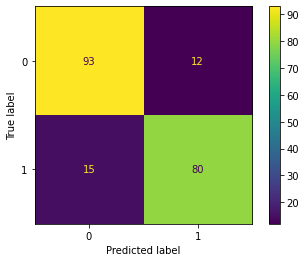

In [4]:
import sklearn.metrics as metrics

nn.fit(train_x, train_y)

metrics.plot_confusion_matrix(nn, test_x, test_y)

The AUC is **0.91**.

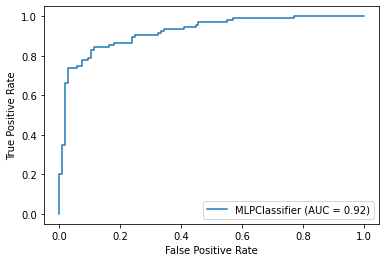

In [5]:
metrics.plot_roc_curve(nn, test_x, test_y)

If you are already reading some papers or articles, you should often see a similar chart, that is, as the number of training iteration increases, the loss decreases. In **sklearn**, the **loss** of each iteration is stored in the attribution of a model, **loss_curve_**. Let's plot it.

Text(0, 0.5, 'loss')

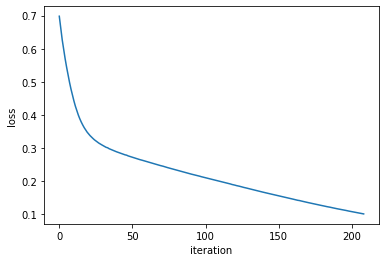

In [14]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots()
axe.plot(range(len(nn.loss_curve_)), nn.loss_curve_)
axe.set_xlabel("iteration")
axe.set_ylabel("loss")